## Download and Load data

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2021-09-18 11:40:29--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2021-09-18 11:40:30 (23.9 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.2 Data Prepatation

The names of columns do not have a common/standard format - some are in lower case, some have spaces, while some use underscores. We will standardize these. Similarly the actual values under these columns (non numerical data) can also be standardized.

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

obj_cols = list(df.dtypes[df.dtypes == 'object'].index)
obj_cols
for col in obj_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## 2.3 Exploratory Data Analysis

We will look at the data to try and understand it better. We will check how many distict values each of the column has, how does the distribution of the values in msrp column (this is the output/target that we would finally like to predict from the data) look like etc.

In [4]:
for col in df.columns:
    print(col)
    print(df[col].nunique(),'\n')

make
48 

model
914 

year
28 

engine_fuel_type
10 

engine_hp
356 

engine_cylinders
9 

transmission_type
5 

driven_wheels
4 

number_of_doors
3 

market_category
71 

vehicle_size
3 

vehicle_style
16 

highway_mpg
59 

city_mpg
69 

popularity
48 

msrp
6049 



Dstribution of price

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

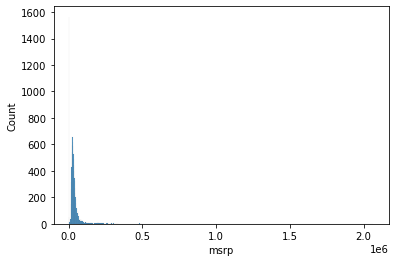

In [6]:
sns.histplot(df.msrp)

Since the distribution is highly skewed, let us check by creating less number of bins (buckets) and look at only prices less than say 100000

<AxesSubplot:xlabel='msrp', ylabel='Count'>

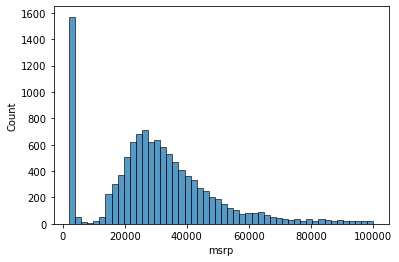

In [7]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

Since some values are very large while a few are small, if we look at log of these values we will have a better scaled representation of these values. Sometimes, some values might have zero value, in such cases, taking log gives error since log0 is -infinity. Hence we add 1 to all values and then take a log (log1 is 0). 

In [8]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

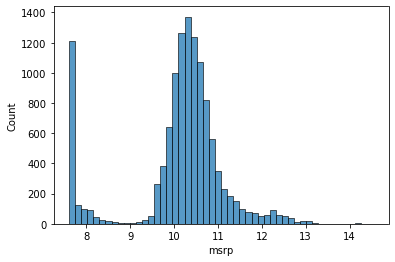

In [9]:
sns.histplot(price_logs,bins=50)

When trying to predict using linear regression method, if there are any missing values, then calculations/oprations on the data will fail. Hence we also need to know if there are any missing values (which we will see later how to handle).

In [10]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

When we create a prediction model, we will need to run our predictions on a subset of the data and validate/test how accurate our predictions are. Now if we develop our model by looking at the entire dataset, then obviously the validation/testing will show high accuracy (since our model already knows that data). Hence we will create 3 parts/subsets of the entire dataset - set1 to be used to train our model, set2 to validate our model (on unseen data) and possibly fine tune our model and validate again, till we have a good enough model, set3 to finally test the fine tuned model (again on another set of unseen data)

We will split set1=training (60%) : set2=validation (20%) : set3=testing (20%)

In [11]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)
print(n, n_train, n_val, n_test)
print(n, n_val + n_test + n_train)   # Usually depending on computer to computer the floating point calculations may cause different number of values, hence we rather use the distribution shown in below cell

11914 7148 2382 2382
11914 11912


We can see that adding the parts is not equal to the total, since we took a fraction but then used the integer part (discarding the fraction part). Hence better would be to take training data as total data - the other 2 subsets

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)
print(n, n_val + n_test + n_train)

11914 7150 2382 2382
11914 11914


In [13]:
df_train = df[:n_train]
df_val = df[n_train:n_train+n_val]
df_test = df[n_train+n_val:]
print(len(df_train),len(df_val),len(df_test))

7150 2382 2382


In [14]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [15]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


If we do distribution in above manner and if the data is say in a sorted fashion, then specific type of cars (or whatever the data) will appear in validation but not in train or test dataset, which is not good for building a model. We rather need the data to be shuffled and then split.

In [16]:
# #Shuffle the data method 1 using inbuilt method
# df = df.sample(frac=1,random_state=42)
# df

#Shuffle the data method 2
idx = np.arange(n) #Create indices with the length of the dataframe
np.random.seed(2)  #To make the randomness reproducible, set some defined seed number 
np.random.shuffle(idx) #Shuffle the indices randomly

#Assign the train, val, test data using the shuffled indices. Since we shuffled the incides, they are now not in an order but rather in a shuffled state
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]

Noticed that df[:n_val], df.iloc[:n_val] and df.loc[:n_val] give same results (since the indices and locations are same numbers)

The existing index after reshuffling is now not in sequence, so lets reset the index and since reset causes the original index to get saved as additional column in the data, whereas we dont want that information, we will drop it.

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

We will now transform our target since it had a long tail. We will transform using log1p (logarithm after adding 1 to the values)

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Now lets delete the msrp (target variable) from our data frame since we do not want to accidently train our model with the target as part of the data

In [19]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [20]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [21]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

## Linear Regression

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Taking one row from the data, let us develop a linear regression calculation using bias w0 and weights w on data xi to predict target y.

y = w0 + w1.x1 + w2.x2 + w3.x3

y = w0 + w.X

In [23]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [24]:
def linear_regression(xi):
    pred = w0
    n = len(xi)
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [25]:
pred = linear_regression(xi)
pred

12.312

Since we had taken log of the target (msrp) + 1, let us take exponential of the result - 1 (using expm1) to get the actual predicted value

In [26]:
np.expm1(pred)

222347.2221101062

In [27]:
y_train[10]

13.08107460729463

In [28]:
np.expm1(y_train[10])

479775.00000000006

We are way off in terms of accuracy, but this is a good start.

## Linear regression vector form

Instead of calculating the target value for a single row, let us create a function to calculate for any number of rows (that is any amount of data points)

In [29]:
def dot(xi,w):
    xi = [1] + xi
    n=len(xi)
    res = 0.0
    for j in range(n):
        res = res + w[j]*xi[j]
    return res

def linear_regression(xi,w):
    return dot(xi,w)

new_w = [w0] + w
pred = linear_regression(xi,new_w)
pred

12.312

In [30]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453,11, 86]

X = [x1, x2, x10]
X = np.array(X)

In [31]:
X.dot(new_w)

array([12.38 , 13.552, 12.312])

In [32]:
def linear_regression(X):
    return X.dot(new_w)

linear_regression(X)

array([12.38 , 13.552, 12.312])

#### Need to add self notes for below sections

## Training linear regression model

In [33]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [34]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
X = np.column_stack([ones,X]) 

In [36]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [37]:
XTX = X.T.dot(X)

In [38]:
XTX_inv = np.linalg.inv(XTX)

In [39]:
w_full = XTX_inv.dot(X.T).dot(y)

In [40]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [41]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]    

In [42]:
#Reinitialize X, since we modified it above
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [43]:
train_linear_regression(X,y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## Car price baseline model

In [44]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [45]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [46]:
numerical_features = list(df_train.dtypes[df_train.dtypes == 'float64'].index.values) + list(df_train.dtypes[df_train.dtypes == 'int64'].index.values)
numerical_features

['engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'year',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [47]:
features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [48]:
X_train = df_train[features].values

In [49]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [50]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [51]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [52]:
df_train[features].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [53]:
X_train = df_train[features].fillna(0).values

In [54]:
w0, w = train_linear_regression(X_train,y_train)

In [55]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

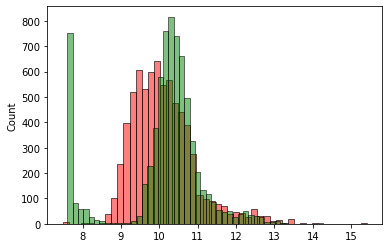

In [56]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='green', alpha=0.5, bins=50)

## RMSE

In [57]:
def rmse(y,y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [58]:
rmse(y_train,y_pred)

0.7554192603920132

## Validating model

In [59]:
def prepare_X(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.7616530991301601

## Simple feature engineering

In [61]:
features + ['age']

['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age']

In [62]:
df.year.max()

2017

In [63]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    new_features = features + ['age']
    df_num = df[new_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

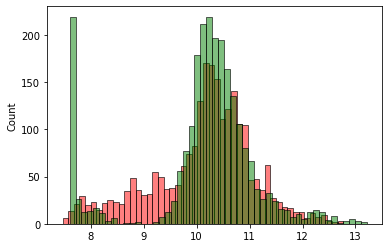

In [65]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='green', alpha=0.5, bins=50)

In [66]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    new_features = features + ['age']
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype(int)
        new_features.append(f'num_doors_{v}')
        
    df_num = df[new_features]
    df_num = df_num.fillna(0)

    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5157995641502353

In [68]:
list(df_train.make.value_counts().head().index.values)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [69]:
makes = list(df_train.make.value_counts().head().index.values)

In [70]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    new_features = features + ['age']
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype(int)
        new_features.append(f'num_doors_{v}')
        
    for v in makes:
        df[f'make_{v}'] = (df['make'] == v).astype(int)
        new_features.append(f'make_{v}')
        
    df_num = df[new_features]
    df_num = df_num.fillna(0)

    X = df_num.values
    return X

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5076038849557035

In [72]:
list(df.dtypes[df.dtypes == 'object'].index.values)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [73]:
categorical_vars = [
    'make',
    'engine_fuel_type',
    'transmission_type',
    'driven_wheels',
    'market_category',
    'vehicle_size',
    'vehicle_style'
]

categories = {}

for c in categorical_vars:
    categories[c] = list(df[c].value_counts().head().index)
    
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [74]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    new_features = features + ['age']
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype(int)
        new_features.append(f'num_doors_{v}')
    
    for c, values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c] == v).astype(int)
            new_features.append(f'{c}_{v}')
        
    df_num = df[new_features]
    df_num = df_num.fillna(0)

    X = df_num.values
    return X

In [75]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

30.831856811140785

Although our aim was to add more features and get better (smaller value) rmse, the rmse actually worsened. We will see why this happened next.

## Regularization

In [76]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [77]:
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [78]:
XTX = X.T.dot(X)
np.linalg.inv(XTX)

LinAlgError: Singular matrix

The inverse calculation fails since the last two columns have same values (duplicate). Now lets add a small noise to one of the element.

In [79]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [80]:
X.T.dot(X)

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [81]:
XTX = X.T.dot(X)
np.linalg.inv(XTX)

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [82]:
y = [1, 2, 3, 1, 2, 3]
XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

We get very large numbers (2nd and 3rd elements). This is mainly if 2 columns are numerically similar. To overcome this, we need to add a small number (alpha) to all the diagonal elements of XTX. Larger this number that we add, smaller will be the values of the inverse matrix and hence the weights will be in control. This is called regularization.

In [83]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [84]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]   

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,r=0.1)
print(w0, w)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

6.191208657249507 [ 1.75297351e-03  1.10945322e-01 -4.93925611e-03 -5.67761532e-03
 -5.03560881e-05 -9.60805778e-02 -6.47202289e-01 -7.49956439e-01
 -4.78649309e-01 -4.26364765e-02  1.76912656e-01  1.44329134e-02
 -1.00174115e-01 -1.07675346e-01 -4.51529215e-01  7.81684107e-02
 -3.17691742e-01 -5.30419446e-01 -8.49080202e-02  1.07743157e+00
  9.08077911e-01  1.13769138e+00  2.59641925e+00  4.71588666e-01
  1.58294734e+00  1.51346939e+00  1.57743709e+00  1.51735487e+00
 -8.46513465e-02  4.60486851e-02 -4.81310179e-02 -3.59785038e-02
  7.97021702e-03  2.14894690e+00  2.03375117e+00  2.00851062e+00
 -4.86964574e-02  5.49632329e-02  1.78040064e-01  3.42043326e-01
 -1.65777386e-01]


0.45656927630428956

## Tuning the model

Different values of regularization parameter result into better or worse results. We will try to now see the results for different values of r (regularization parameter) in oder to determine which value gives best model

In [86]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 1.0988239383087294e+16 30.831856811140785
1e-05 9.26383337942147 0.45651701514002485
0.0001 6.330946374662725 0.4565170629154452
0.001 6.28552228338358 0.45651750869690466
0.1 6.191208657249507 0.45656927630428956
1 5.634896667948973 0.45722043179967
10 4.283980108969979 0.47014569320991506


We can see that for 0 regularization we have a huge bias and rmse score is also high (indicating higher error). Whereas even for a small regularization we see some improvement and as we increase r, we see even further improvement in terms of not a huge bias and smaller error. The results improve with increase in r upto a point, then stablizes and then starts degrading.

We will use the best regularization parameter to check the score on validation data set

In [87]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.45651750869690466

## Using the model

Now we will train our model using the training+validation data set and check rmse of predictions on test dataset

In [88]:
df_train_full = pd.concat([df_train,df_val])
df_train_full

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


Since after concatenating the 2 data sets, the indices will have come from the 2 datasets, we will reset the index

In [89]:
df_train_full = df_train_full.reset_index(drop=True)
df_train_full

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


Prepare our X_train_full from the combined dataset

In [90]:
X_train_full = prepare_X(df_train_full)

Similarly let us combine the y_train and y_val to be used for our model training using the combined dataset

In [91]:
y_train_full = np.concatenate([y_train,y_val])
print(len(y_train_full))
y_train_full

9532


array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [92]:
w0, w = train_linear_regression_reg(X_train_full,y_train_full,r=0.001)

Now prepare the test data

In [93]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45177493043487965

Now we can use our model to predict value of car for any new data for a car. Here we will pick one of the entries from our test data set itself (since we did not use that to train our model and we do not have any more data, lets use one entry from the test dataset)

In [94]:
df_test.iloc[21]

make                             dodge
model                          caravan
year                              2006
engine_fuel_type      regular_unleaded
engine_hp                        150.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category              flex_fuel
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         24
city_mpg                            17
popularity                        1851
Name: 21, dtype: object

Let us take one of the entries in test dataset and convert into a dictionary - since in real scenario, typically the input we will receive from any appliction that we develop/deploy for such predictions will collect input from user and pass them in a dictionary form to our application

In [95]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

When we receive this input, we will need to convert it into a pandas dataframe, so that we can pass it on to the functions we developed to process data and predict using our model

In [96]:
df_input = pd.DataFrame([car])
df_input

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [97]:
X_input = prepare_X(df_input)
X_input

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [98]:
y_pred = w0 + X_input.dot(w)
y_pred

array([10.6564701])

In [99]:
np.expm1(y_pred)[0]

42465.46969996435

In [100]:
np.expm1(y_test[20])

35000.00000000001

Our prediction is off by abot 7k - which is not very good, but it has been a good basis for learning